In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the csv files from the source in the Barcelona Open Portal
url_2015 = "https://opendata-ajuntament.barcelona.cat/data/dataset/79bdf758-dae1-485b-800c-be9f8cfa9360/resource/bb4de997-cdf9-43ad-98c6-cc3a3e4d4f07/download/2015_distribucio_territorial_renda_familiar.csv"
url_2016 = "https://opendata-ajuntament.barcelona.cat/data/dataset/79bdf758-dae1-485b-800c-be9f8cfa9360/resource/1d9ff171-6f23-45c1-b02f-203b0589f08a/download/2016_distribucio_territorial_renda_familiar.csv"
data_2015 = pd.read_csv(url_2015)
data_2016 = pd.read_csv(url_2016)

In [3]:
data_2015.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Població,Índex RFD Barcelona = 100
0,2015,1,Ciutat Vella,1,el Raval,47617,75.8
1,2015,1,Ciutat Vella,2,el Barri Gòtic,15269,108.5
2,2015,1,Ciutat Vella,3,la Barceloneta,15036,76.6
3,2015,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22305,96.4
4,2015,2,Eixample,5,el Fort Pienc,31645,104.8


In [5]:
#create a new dataframe for both the 2015 and 2016 to find difference between the barrios. 
data_combined = pd.concat([data_2015.set_index('Nom_Barri'), data_2016.set_index('Nom_Barri')], 
                   axis='columns', keys=['2015', '2016'], sort=False)
data_combined.head()

2015                               \
                                        Any Codi_Districte Nom_Districte   
el Raval                               2015              1  Ciutat Vella   
el Barri Gòtic                         2015              1  Ciutat Vella   
la Barceloneta                         2015              1  Ciutat Vella   
Sant Pere, Santa Caterina i la Ribera  2015              1  Ciutat Vella   
el Fort Pienc                          2015              2      Eixample   

                                                           \
                                      Codi_Barri Població   
el Raval                                       1    47617   
el Barri Gòtic                                 2    15269   
la Barceloneta                                 3    15036   
Sant Pere, Santa Caterina i la Ribera          4    22305   
el Fort Pienc                                  5    31645   

                                                                   2016  \
                                      Índex RFD Barcelona = 100     Any   
el Raval                                                   75.8  2016.0   
el Barri Gòtic                                            108.5  2016.0   
la Barceloneta                                             76.6  2016.0   
Sant Pere, Santa Caterina i la Ribera                      96.4  2016.0   
el Fort Pienc                                             104.8  2016.0   

                                                                               \
                                      Codi_Districte Nom_Districte Codi_Barri   
el Raval                                         1.0  Ciutat Vella        1.0   
el Barri Gòtic                                   1.0  Ciutat Vella        2.0   
la Barceloneta                                   1.0  Ciutat Vella        3.0   
Sant Pere, Santa Caterina i la Ribera            1.0  Ciutat Vella        4.0   
el Fort Pienc                                    2.0      Eixample        5.0   

                                                                          
                                      Població Índex RFD Barcelona = 100  
el Raval                               47274.0                      74.6  
el Barri Gòtic                         15729.0                     110.5  
la Barceloneta                         15068.0                      84.8  
Sant Pere, Santa Caterina i la Ribera  22380.0                      97.8  
el Fort Pienc                          31693.0                     105.0

In [9]:
#compare the population by neighbourhood, adding a column for difference
data_combined['difference'] = data_combined['2016']['Població'] - data_combined['2015']['Població']
data_combined.head()

2015                               \
                                        Any Codi_Districte Nom_Districte   
el Raval                               2015              1  Ciutat Vella   
el Barri Gòtic                         2015              1  Ciutat Vella   
la Barceloneta                         2015              1  Ciutat Vella   
Sant Pere, Santa Caterina i la Ribera  2015              1  Ciutat Vella   
el Fort Pienc                          2015              2      Eixample   

                                                           \
                                      Codi_Barri Població   
el Raval                                       1    47617   
el Barri Gòtic                                 2    15269   
la Barceloneta                                 3    15036   
Sant Pere, Santa Caterina i la Ribera          4    22305   
el Fort Pienc                                  5    31645   

                                                                   2016  \
                                      Índex RFD Barcelona = 100     Any   
el Raval                                                   75.8  2016.0   
el Barri Gòtic                                            108.5  2016.0   
la Barceloneta                                             76.6  2016.0   
Sant Pere, Santa Caterina i la Ribera                      96.4  2016.0   
el Fort Pienc                                             104.8  2016.0   

                                                                               \
                                      Codi_Districte Nom_Districte Codi_Barri   
el Raval                                         1.0  Ciutat Vella        1.0   
el Barri Gòtic                                   1.0  Ciutat Vella        2.0   
la Barceloneta                                   1.0  Ciutat Vella        3.0   
Sant Pere, Santa Caterina i la Ribera            1.0  Ciutat Vella        4.0   
el Fort Pienc                                    2.0      Eixample        5.0   

                                                                          \
                                      Població Índex RFD Barcelona = 100   
el Raval                               47274.0                      74.6   
el Barri Gòtic                         15729.0                     110.5   
la Barceloneta                         15068.0                      84.8   
Sant Pere, Santa Caterina i la Ribera  22380.0                      97.8   
el Fort Pienc                          31693.0                     105.0   

                                      difference  
                                                  
el Raval                                  -343.0  
el Barri Gòtic                             460.0  
la Barceloneta                              32.0  
Sant Pere, Santa Caterina i la Ribera       75.0  
el Fort Pienc                               48.0

In [10]:
# Whcih neighbourhood had the biggest increase in the population
data_combined.sort_values(by=['difference'], ascending=False)

# Biggest increase in population can be seen in el Gotico and Eixample. The population decreased in el Raval and el Besòs i el Maresme the most.	

2015                                      \
                                     Any Codi_Districte        Nom_Districte   
el Barri Gòtic                      2015              1         Ciutat Vella   
la Dreta de l'Eixample              2015              2             Eixample   
Provençals del Poblenou             2015             10           Sant Martí   
Sant Gervasi - la Bonanova          2015              5  Sarrià-Sant Gervasi   
el Camp d'en Grassot i Gràcia Nova  2015              6               Gràcia   
...                                  ...            ...                  ...   
la Trinitat Vella                   2015              9          Sant Andreu   
la Sagrera                          2015              9          Sant Andreu   
el Raval                            2015              1         Ciutat Vella   
el Besòs i el Maresme               2015             10           Sant Martí   
No consta                           2015             99            No consta   

                                                        \
                                   Codi_Barri Població   
el Barri Gòtic                              2    15269   
la Dreta de l'Eixample                      7    43344   
Provençals del Poblenou                    71    20244   
Sant Gervasi - la Bonanova                 25    25511   
el Camp d'en Grassot i Gràcia Nova         32    34047   
...                                       ...      ...   
la Trinitat Vella                          57    10210   
la Sagrera                                 61    29020   
el Raval                                    1    47617   
el Besòs i el Maresme                      70    23026   
No consta                                  99        1   

                                                                2016  \
                                   Índex RFD Barcelona = 100     Any   
el Barri Gòtic                                         108.5  2016.0   
la Dreta de l'Eixample                                 165.8  2016.0   
Provençals del Poblenou                                102.8  2016.0   
Sant Gervasi - la Bonanova                             188.9  2016.0   
el Camp d'en Grassot i Gràcia Nova                     103.0  2016.0   
...                                                      ...     ...   
la Trinitat Vella                                       43.1  2016.0   
la Sagrera                                              76.8  2016.0   
el Raval                                                75.8  2016.0   
el Besòs i el Maresme                                   54.4  2016.0   
No consta                                                  -     NaN   

                                                                        \
                                   Codi_Districte        Nom_Districte   
el Barri Gòtic                                1.0         Ciutat Vella   
la Dreta de l'Eixample                        2.0             Eixample   
Provençals del Poblenou                      10.0           Sant Martí   
Sant Gervasi - la Bonanova                    5.0  Sarrià-Sant Gervasi   
el Camp d'en Grassot i Gràcia Nova            6.0               Gràcia   
...                                           ...                  ...   
la Trinitat Vella                             9.0          Sant Andreu   
la Sagrera                                    9.0          Sant Andreu   
el Raval                                      1.0         Ciutat Vella   
el Besòs i el Maresme                        10.0           Sant Martí   
No consta                                     NaN                  NaN   

                                                        \
                                   Codi_Barri Població   
el Barri Gòtic                            2.0  15729.0   
la Dreta de l'Eixample                    7.0  43715.0   
Provençals del Poblenou                  71.0  20516.0   
Sant Gervasi - la Bonanova               25.0  257

In [71]:
#Select only neighbourhoods where population above chosen value
busier_hood = data_2015['Població'] > 40000

busier_2015 = data_2015[busier_hood]

busier_2015.head()



,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Població,Índex RFD Barcelona = 100
0,2015,1,Ciutat Vella,1,el Raval,47617,75.8
5,2015,2,Eixample,6,la Sagrada Família,51347,95.8
6,2015,2,Eixample,7,la Dreta de l'Eixample,43344,165.8
7,2015,2,Eixample,8,l'Antiga Esquerra de l'Eixample,41696,128.9
8,2015,2,Eixample,9,la Nova Esquerra de l'Eixample,57711,103.8


In [72]:
#How many neighbourhoods had population higher than 35 000 as of 2015?
len(busier_2015.index)

11

In [81]:
#plot = busier_2015.plot.pie(y='Població', labels = [6])
pieLabels = list(busier_2015['Nom_Barri'])
colors = ['#00dae2','#00bce2','#008fe2','#0071e2','#0048e2','#0022e2','#0008e2','#6900e2','#8f00e2','#b500e2', '#de00e2',]

#pieLabels

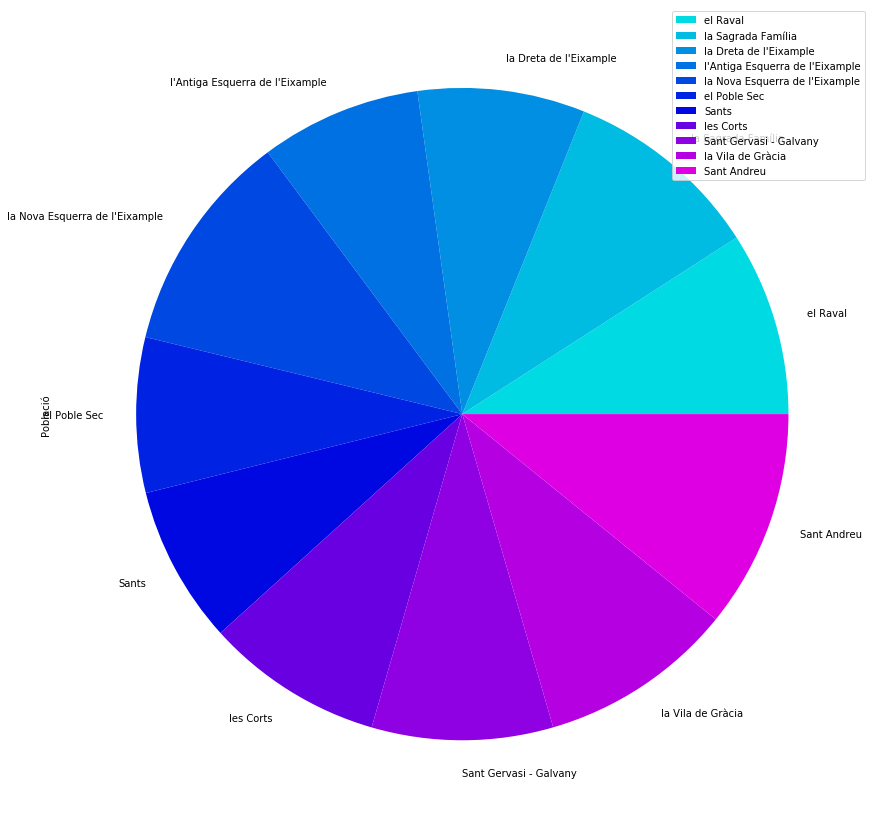

In [82]:
plot = busier_2015.plot.pie(y='Població', labels = pieLabels, figsize=(25, 15), colors = colors)
#plt.legend(plot[0],labels = pieLabels, loc=best)
#plot.legend(loc=best, labels=pieLabels)

In [83]:
#The same for 2016 
# #Select only neighbourhoods where population above chosen value
busier_hood = data_2016['Població'] > 40000

busier_2016 = data_2016[busier_hood]

busier_2016.head()
#The top 5 neighbourhoods are the same as in 2015

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Població,Índex RFD Barcelona = 100
0,2016,1,Ciutat Vella,1,el Raval,47274,74.6
5,2016,2,Eixample,6,la Sagrada Família,51349,95.9
6,2016,2,Eixample,7,la Dreta de l'Eixample,43715,170.0
7,2016,2,Eixample,8,l'Antiga Esquerra de l'Eixample,41872,139.2
8,2016,2,Eixample,9,la Nova Esquerra de l'Eixample,57676,105.3


In [84]:
#How many neighbourhoods had population higher than 35 000 as of 2015?
len(busier_2016.index)
#Looks like it is the same number of neighbourhoods

11

In [85]:
#plot = busier_2016.plot.pie(y='Població', labels = [6])
pieLabels = list(busier_2016['Nom_Barri'])
colors = ['#00dae2','#00bce2','#008fe2','#0071e2','#0048e2','#0022e2','#0008e2','#6900e2','#8f00e2','#b500e2', '#de00e2',]

#pieLabels

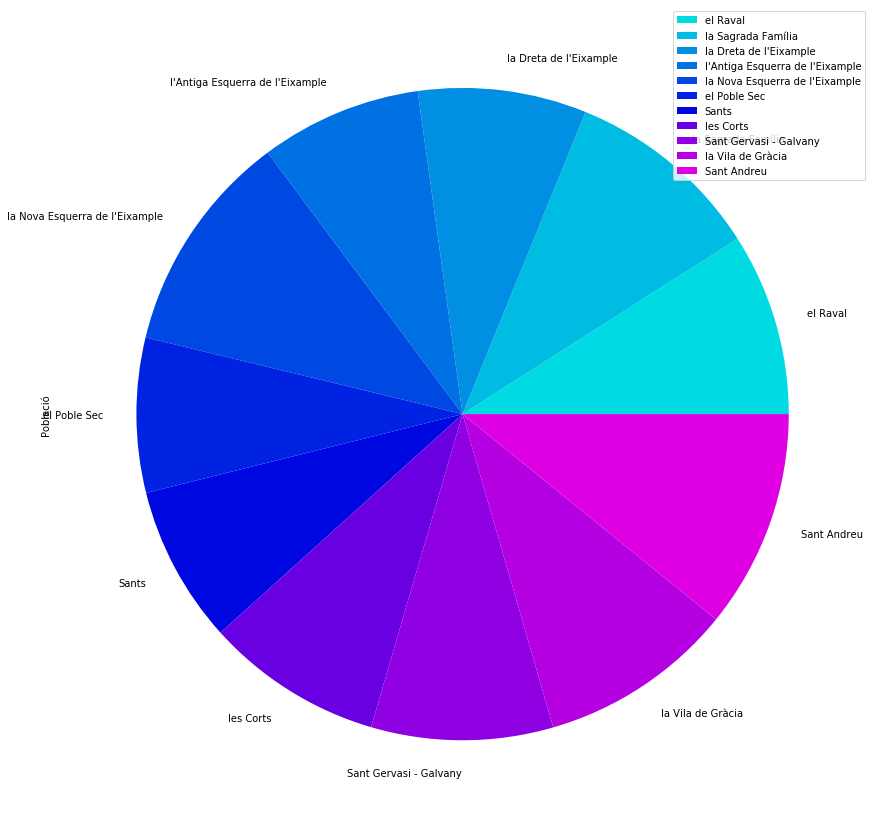

In [86]:
plot = busier_2016.plot.pie(y='Població', labels = pieLabels, figsize=(25, 15), colors = colors)
#plt.legend(plot[0],labels = pieLabels, loc=best)
#plot.legend(loc=best, labels=pieLabels)

In [ ]:
# I think this data over more years of distance would be very interesting to observe. 
# e.g compare the years 2010 to 2020. As between 2015 and 2016 the changes are not so drastic.
